<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/Estimating_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATA/missdata.csv')
df

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,NaN,9.1,76.0,56,127.0,NaN,44.0,18.0,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,NaN,7.3,84.0,52,140.0,NaN,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,28-Apr-15,7.60,5.6,NaN,8,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,29-Apr-15,7.30,5.6,NaN,96,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,30-Apr-15,5.10,5.8,290.0,12,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,01-May-15,7.40,6.4,NaN,72,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        487 non-null    object 
 1   pH          485 non-null    float64
 2   DO          486 non-null    float64
 3   TDS         383 non-null    float64
 4   Alkalinity  487 non-null    int64  
 5   EC          483 non-null    float64
 6   Na          485 non-null    float64
 7   Ca          445 non-null    float64
 8   Mg          448 non-null    float64
 9   K           433 non-null    float64
 10  F           422 non-null    float64
 11  Cl          466 non-null    float64
 12  Nitrate     485 non-null    float64
 13  Sulphate    460 non-null    float64
 14  Phosphate   395 non-null    float64
 15  WPI         400 non-null    float64
dtypes: float64(14), int64(1), object(1)
memory usage: 61.0+ KB


In [5]:
df.isnull()

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
483,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
484,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
485,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
print(df.describe())

               pH          DO         TDS  ...    Sulphate   Phosphate         WPI
count  485.000000  486.000000  383.000000  ...  460.000000  395.000000  400.000000
mean     7.809499    7.445144  115.851958  ...   14.195187    0.094645    0.296527
std      0.411056    1.105480   46.954561  ...   14.264553    0.167975    0.141283
min      5.100000    4.200000   56.000000  ...    0.792000    0.000000    0.160199
25%      7.570000    6.712500   84.000000  ...    5.347729    0.024500    0.221366
50%      7.860000    7.400000  102.000000  ...    9.109687    0.047000    0.253162
75%      8.100000    8.100000  128.500000  ...   17.160000    0.093252    0.312652
max      8.570000   13.500000  294.000000  ...  104.480000    1.765000    1.604375

[8 rows x 15 columns]


In [7]:
print(df.isnull().sum())

Date            0
pH              2
DO              1
TDS           104
Alkalinity      0
EC              4
Na              2
Ca             42
Mg             39
K              54
F              65
Cl             21
Nitrate         2
Sulphate       27
Phosphate      92
WPI            87
dtype: int64


In [8]:
print(df.head())

        Date    pH   DO    TDS  ...   Nitrate  Sulphate  Phosphate       WPI
0  01-Jan-14  8.14  8.7   84.0  ...  0.758000  6.534660    0.06211  0.249528
1  02-Jan-14  7.70  8.8  110.0  ...  0.196062  8.138620    0.00960  0.216400
2  03-Jan-14  7.60  7.5   75.0  ...  0.298875  3.855625    0.01280  0.183814
3  04-Jan-14   NaN  9.1   76.0  ...  0.299591  2.238750    0.01536  0.219282
4  05-Jan-14   NaN  7.3   84.0  ...  0.106000  5.600000    0.01000  0.165831

[5 rows x 16 columns]


In [9]:
print(df['TDS'].head(100))

0      84.0
1     110.0
2      75.0
3      76.0
4      84.0
      ...  
95     88.0
96     88.0
97     98.0
98    108.0
99     92.0
Name: TDS, Length: 100, dtype: float64


In [10]:
# a list with all missing value formats
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("/content/drive/MyDrive/DATA/missdata.csv", na_values = missing_value_formats)


print(df['pH'].head(10))

0    8.14
1    7.70
2    7.60
3     NaN
4     NaN
5    8.40
6    7.40
7    7.90
8    8.00
9    7.40
Name: pH, dtype: float64


In [11]:
import pandas as pd

missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("/content/drive/MyDrive/DATA/missdata.csv", na_values = missing_value_formats)

def make_int(i):
    try:
        return int(i)
    except:
        return pd.np.nan

# apply make_int function to the entire series using map
df['pH'] = df['pH'].map(make_int)
print(df['pH'].head())

0    8.0
1    7.0
2    7.0
3    NaN
4    NaN
Name: pH, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  # Remove the CWD from sys.path while we load stuff.


In [12]:
# NaN values are marked True
print(df['pH'].isnull().head(10))
# NaN values are marked False 
print(df['pH'].notnull().head(10))

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9    False
Name: pH, dtype: bool
0     True
1     True
2     True
3    False
4    False
5     True
6     True
7     True
8     True
9     True
Name: pH, dtype: bool


In [13]:
# notnull will return False for all NaN values
null_filter = df['pH'].notnull()
# prints only those rows where null_filter is True
print(df[null_filter])

          Date   pH   DO    TDS  ...   Nitrate    Sulphate  Phosphate       WPI
0    01-Jan-14  8.0  8.7   84.0  ...  0.758000    6.534660    0.06211  0.249528
1    02-Jan-14  7.0  8.8  110.0  ...  0.196062    8.138620    0.00960  0.216400
2    03-Jan-14  7.0  7.5   75.0  ...  0.298875    3.855625    0.01280  0.183814
5    06-Jan-14  8.0  7.4  103.0  ...  0.506000   12.810000    0.10600  0.308627
6    07-Jan-14  7.0  NaN    NaN  ...  0.314000   20.521000    0.24300  0.406891
..         ...  ...  ...    ...  ...       ...         ...        ...       ...
482  28-Apr-15  7.0  5.6    NaN  ...  1.352000  104.480000    0.01500  0.419630
483  29-Apr-15  7.0  5.6    NaN  ...  7.074000   61.068000    0.03300  0.432996
484  30-Apr-15  5.0  5.8  290.0  ...  9.256000   89.910000    0.16300  0.326811
485  01-May-15  7.0  6.4    NaN  ...  7.110435   48.500000    0.21900  0.509970
486  02-May-15  7.0  6.9    NaN  ...  6.385000   59.940000    0.07000  0.422551

[485 rows x 16 columns]


In [14]:
print(df.isnull().values.any())


True


In [15]:
print(df.isnull().sum())

Date            0
pH              2
DO              1
TDS           104
Alkalinity      0
EC              4
Na              2
Ca             42
Mg             39
K              54
F              65
Cl             21
Nitrate         2
Sulphate       27
Phosphate      92
WPI            87
dtype: int64


**Imputing Missing Values in our Dataset**

**replace missing values with 0**

In [16]:
df['pH'].fillna(0, inplace=True)
print(df['pH'].head(10))

0    8.0
1    7.0
2    7.0
3    0.0
4    0.0
5    8.0
6    7.0
7    7.0
8    8.0
9    7.0
Name: pH, dtype: float64


In [17]:
df.fillna(0, inplace=True)
print(df.head(10))

        Date   pH   DO    TDS  ...   Nitrate   Sulphate  Phosphate       WPI
0  01-Jan-14  8.0  8.7   84.0  ...  0.758000   6.534660    0.06211  0.249528
1  02-Jan-14  7.0  8.8  110.0  ...  0.196062   8.138620    0.00960  0.216400
2  03-Jan-14  7.0  7.5   75.0  ...  0.298875   3.855625    0.01280  0.183814
3  04-Jan-14  0.0  9.1   76.0  ...  0.299591   2.238750    0.01536  0.219282
4  05-Jan-14  0.0  7.3   84.0  ...  0.106000   5.600000    0.01000  0.165831
5  06-Jan-14  8.0  7.4  103.0  ...  0.506000  12.810000    0.10600  0.308627
6  07-Jan-14  7.0  0.0    0.0  ...  0.314000  20.521000    0.24300  0.406891
7  08-Jan-14  7.0  6.8   94.0  ...  1.423000   8.830000    0.04500  0.291804
8  09-Jan-14  8.0  8.0  106.0  ...  0.157806   7.400000    0.01400  0.219930
9  10-Jan-14  7.0  5.9  117.0  ...  0.059000   7.711000    0.00000  0.237340

[10 rows x 16 columns]


**Replacing NaNs with the value from the previous row or the next row**

In [18]:
import numpy as np
df = df.replace(0, np.nan)
print(df.head(10))

        Date   pH   DO    TDS  ...   Nitrate   Sulphate  Phosphate       WPI
0  01-Jan-14  8.0  8.7   84.0  ...  0.758000   6.534660    0.06211  0.249528
1  02-Jan-14  7.0  8.8  110.0  ...  0.196062   8.138620    0.00960  0.216400
2  03-Jan-14  7.0  7.5   75.0  ...  0.298875   3.855625    0.01280  0.183814
3  04-Jan-14  NaN  9.1   76.0  ...  0.299591   2.238750    0.01536  0.219282
4  05-Jan-14  NaN  7.3   84.0  ...  0.106000   5.600000    0.01000  0.165831
5  06-Jan-14  8.0  7.4  103.0  ...  0.506000  12.810000    0.10600  0.308627
6  07-Jan-14  7.0  NaN    NaN  ...  0.314000  20.521000    0.24300  0.406891
7  08-Jan-14  7.0  6.8   94.0  ...  1.423000   8.830000    0.04500  0.291804
8  09-Jan-14  8.0  8.0  106.0  ...  0.157806   7.400000    0.01400  0.219930
9  10-Jan-14  7.0  5.9  117.0  ...  0.059000   7.711000        NaN  0.237340

[10 rows x 16 columns]


In [19]:
df['pH'].fillna(method='pad', inplace=True)
print(df['pH'].head(10))

0    8.0
1    7.0
2    7.0
3    7.0
4    7.0
5    8.0
6    7.0
7    7.0
8    8.0
9    7.0
Name: pH, dtype: float64


In [20]:
df['pH'].fillna(method='bfill', inplace=True)
print(df['pH'].head(10))

0    8.0
1    7.0
2    7.0
3    7.0
4    7.0
5    8.0
6    7.0
7    7.0
8    8.0
9    7.0
Name: pH, dtype: float64


In [21]:
df.fillna(method='pad', inplace=True)
print(df.head(10))

        Date   pH   DO    TDS  ...   Nitrate   Sulphate  Phosphate       WPI
0  01-Jan-14  8.0  8.7   84.0  ...  0.758000   6.534660    0.06211  0.249528
1  02-Jan-14  7.0  8.8  110.0  ...  0.196062   8.138620    0.00960  0.216400
2  03-Jan-14  7.0  7.5   75.0  ...  0.298875   3.855625    0.01280  0.183814
3  04-Jan-14  7.0  9.1   76.0  ...  0.299591   2.238750    0.01536  0.219282
4  05-Jan-14  7.0  7.3   84.0  ...  0.106000   5.600000    0.01000  0.165831
5  06-Jan-14  8.0  7.4  103.0  ...  0.506000  12.810000    0.10600  0.308627
6  07-Jan-14  7.0  7.4  103.0  ...  0.314000  20.521000    0.24300  0.406891
7  08-Jan-14  7.0  6.8   94.0  ...  1.423000   8.830000    0.04500  0.291804
8  09-Jan-14  8.0  8.0  106.0  ...  0.157806   7.400000    0.01400  0.219930
9  10-Jan-14  7.0  5.9  117.0  ...  0.059000   7.711000    0.01400  0.237340

[10 rows x 16 columns]


In [22]:
df.fillna(method='bfill', inplace=True)
print(df.head(10))

        Date   pH   DO    TDS  ...   Nitrate   Sulphate  Phosphate       WPI
0  01-Jan-14  8.0  8.7   84.0  ...  0.758000   6.534660    0.06211  0.249528
1  02-Jan-14  7.0  8.8  110.0  ...  0.196062   8.138620    0.00960  0.216400
2  03-Jan-14  7.0  7.5   75.0  ...  0.298875   3.855625    0.01280  0.183814
3  04-Jan-14  7.0  9.1   76.0  ...  0.299591   2.238750    0.01536  0.219282
4  05-Jan-14  7.0  7.3   84.0  ...  0.106000   5.600000    0.01000  0.165831
5  06-Jan-14  8.0  7.4  103.0  ...  0.506000  12.810000    0.10600  0.308627
6  07-Jan-14  7.0  7.4  103.0  ...  0.314000  20.521000    0.24300  0.406891
7  08-Jan-14  7.0  6.8   94.0  ...  1.423000   8.830000    0.04500  0.291804
8  09-Jan-14  8.0  8.0  106.0  ...  0.157806   7.400000    0.01400  0.219930
9  10-Jan-14  7.0  5.9  117.0  ...  0.059000   7.711000    0.01400  0.237340

[10 rows x 16 columns]


**Replacing NaNs using Median/Mean of the column**

In [23]:
# using median
df['pH'].fillna(df['pH'].median(), inplace=True)
print(df['pH'].head(10))

0    8.0
1    7.0
2    7.0
3    7.0
4    7.0
5    8.0
6    7.0
7    7.0
8    8.0
9    7.0
Name: pH, dtype: float64


In [24]:
#using mean
df['pH'].fillna(int(df['pH'].mean()), inplace=True)
print(df['pH'].head(10))

0    8.0
1    7.0
2    7.0
3    7.0
4    7.0
5    8.0
6    7.0
7    7.0
8    8.0
9    7.0
Name: pH, dtype: float64


In [25]:
df.isnull().values.any()

False

In [26]:
df.isnull().sum().sum()

0

In [27]:
# using median
df.fillna(df.median(), inplace=True)
print(df.head(10))

        Date   pH   DO    TDS  ...   Nitrate   Sulphate  Phosphate       WPI
0  01-Jan-14  8.0  8.7   84.0  ...  0.758000   6.534660    0.06211  0.249528
1  02-Jan-14  7.0  8.8  110.0  ...  0.196062   8.138620    0.00960  0.216400
2  03-Jan-14  7.0  7.5   75.0  ...  0.298875   3.855625    0.01280  0.183814
3  04-Jan-14  7.0  9.1   76.0  ...  0.299591   2.238750    0.01536  0.219282
4  05-Jan-14  7.0  7.3   84.0  ...  0.106000   5.600000    0.01000  0.165831
5  06-Jan-14  8.0  7.4  103.0  ...  0.506000  12.810000    0.10600  0.308627
6  07-Jan-14  7.0  7.4  103.0  ...  0.314000  20.521000    0.24300  0.406891
7  08-Jan-14  7.0  6.8   94.0  ...  1.423000   8.830000    0.04500  0.291804
8  09-Jan-14  8.0  8.0  106.0  ...  0.157806   7.400000    0.01400  0.219930
9  10-Jan-14  7.0  5.9  117.0  ...  0.059000   7.711000    0.01400  0.237340

[10 rows x 16 columns]


**Using the interpolation method**

In [28]:
df['pH'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(df['pH'].head(10))

0    8.0
1    7.0
2    7.0
3    7.0
4    7.0
5    8.0
6    7.0
7    7.0
8    8.0
9    7.0
Name: pH, dtype: float64


In [29]:
df.interpolate(method='linear', direction = 'forward', inplace=True) 
print(df.head(10))

        Date   pH   DO    TDS  ...   Nitrate   Sulphate  Phosphate       WPI
0  01-Jan-14  8.0  8.7   84.0  ...  0.758000   6.534660    0.06211  0.249528
1  02-Jan-14  7.0  8.8  110.0  ...  0.196062   8.138620    0.00960  0.216400
2  03-Jan-14  7.0  7.5   75.0  ...  0.298875   3.855625    0.01280  0.183814
3  04-Jan-14  7.0  9.1   76.0  ...  0.299591   2.238750    0.01536  0.219282
4  05-Jan-14  7.0  7.3   84.0  ...  0.106000   5.600000    0.01000  0.165831
5  06-Jan-14  8.0  7.4  103.0  ...  0.506000  12.810000    0.10600  0.308627
6  07-Jan-14  7.0  7.4  103.0  ...  0.314000  20.521000    0.24300  0.406891
7  08-Jan-14  7.0  6.8   94.0  ...  1.423000   8.830000    0.04500  0.291804
8  09-Jan-14  8.0  8.0  106.0  ...  0.157806   7.400000    0.01400  0.219930
9  10-Jan-14  7.0  5.9  117.0  ...  0.059000   7.711000    0.01400  0.237340

[10 rows x 16 columns]


In [30]:
from google.colab import files

# e.g. save pandas output as csv
df.to_csv('inter.csv')

# or any other file as usual
# with open('example.csv', 'w') as f:
#   f.write('your strings here')

files.download('inter.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
df

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.0,8.7,84.0,52,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.0,8.8,110.0,76,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.0,7.5,75.0,44,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,7.0,9.1,76.0,56,127.0,8.11,44.0,18.0,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.0,7.3,84.0,52,140.0,8.11,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,28-Apr-15,7.0,5.6,259.0,8,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,29-Apr-15,7.0,5.6,259.0,96,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,30-Apr-15,5.0,5.8,290.0,12,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,01-May-15,7.0,6.4,290.0,72,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [32]:
data = pd.read_csv('/content/drive/MyDrive/DATA/missdata.csv',parse_dates=True,index_col='Date')
data_new=data.copy(deep=True)
data_new.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
Date,,,,,,,,,,,,,,,
2014-01-01,8.14,8.7,84.0,52,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
2014-01-02,7.70,8.8,110.0,76,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2014-01-03,7.60,7.5,75.0,44,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
2014-01-04,NaN,9.1,76.0,56,127.0,NaN,44.0,18.0,1.65,0.396,9.6,0.299591,2.238750,0.01536,0.219282
2014-01-05,NaN,7.3,84.0,52,140.0,NaN,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [33]:
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n" 
               "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [34]:
data_missing= missing_values_table(data_new)
data_missing

Your selected dataframe has 15 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
TDS,104,21.4
Phosphate,92,18.9
WPI,87,17.9
F,65,13.3
K,54,11.1
Ca,42,8.6
Mg,39,8.0
Sulphate,27,5.5
Cl,21,4.3
EC,4,0.8


In [35]:
data_new['TDS'][50:64]

Date
2014-02-20    102.0
2014-02-21     98.0
2014-02-22     80.0
2014-02-23     80.0
2014-02-24      NaN
2014-02-25      NaN
2014-02-26      NaN
2014-02-27      NaN
2014-02-28      NaN
2014-03-01      NaN
2014-03-02      NaN
2014-03-03      NaN
2014-03-04      NaN
2014-03-05      NaN
Name: TDS, dtype: float64

In [36]:
data_new.fillna(method='ffill',inplace=True)
data_new['TDS'][50:65]

Date
2014-02-20    102.0
2014-02-21     98.0
2014-02-22     80.0
2014-02-23     80.0
2014-02-24     80.0
2014-02-25     80.0
2014-02-26     80.0
2014-02-27     80.0
2014-02-28     80.0
2014-03-01     80.0
2014-03-02     80.0
2014-03-03     80.0
2014-03-04     80.0
2014-03-05     80.0
2014-03-06     80.0
Name: TDS, dtype: float64

In [37]:
data_new['WPI'][20:30]

Date
2014-01-21    0.380511
2014-01-22    0.363571
2014-01-23    0.284496
2014-01-24    0.254782
2014-01-25    0.254719
2014-01-26    0.254719
2014-01-27    0.254719
2014-01-28    0.254719
2014-01-29    0.253756
2014-01-30    0.233312
Name: WPI, dtype: float64

In [38]:
data_new.fillna(method='bfill',inplace=True)
data_new['WPI'][50:65]

Date
2014-02-20    0.220874
2014-02-21    0.220874
2014-02-22    0.253932
2014-02-23    0.217126
2014-02-24    0.239521
2014-02-25    0.239521
2014-02-26    0.399795
2014-02-27    0.467951
2014-02-28    0.434023
2014-03-01    0.323594
2014-03-02    0.252288
2014-03-03    0.266049
2014-03-04    0.274732
2014-03-05    0.274732
2014-03-06    0.334685
Name: WPI, dtype: float64

In [39]:
data_new['TDS'][50:65]

Date
2014-02-20    102.0
2014-02-21     98.0
2014-02-22     80.0
2014-02-23     80.0
2014-02-24     80.0
2014-02-25     80.0
2014-02-26     80.0
2014-02-27     80.0
2014-02-28     80.0
2014-03-01     80.0
2014-03-02     80.0
2014-03-03     80.0
2014-03-04     80.0
2014-03-05     80.0
2014-03-06     80.0
Name: TDS, dtype: float64

In [40]:
data_new['Phosphate'][50:65]

Date
2014-02-20    0.070000
2014-02-21    0.062000
2014-02-22    0.065000
2014-02-23    0.045000
2014-02-24    0.067000
2014-02-25    0.018501
2014-02-26    0.018501
2014-02-27    0.153294
2014-02-28    0.066075
2014-03-01    0.005286
2014-03-02    0.033037
2014-03-03    0.074000
2014-03-04    0.089000
2014-03-05    0.039000
2014-03-06    0.138000
Name: Phosphate, dtype: float64

In [41]:
data_new.interpolate(limit_direction="both",inplace=True)
data_new['Phosphate'][50:65]

Date
2014-02-20    0.070000
2014-02-21    0.062000
2014-02-22    0.065000
2014-02-23    0.045000
2014-02-24    0.067000
2014-02-25    0.018501
2014-02-26    0.018501
2014-02-27    0.153294
2014-02-28    0.066075
2014-03-01    0.005286
2014-03-02    0.033037
2014-03-03    0.074000
2014-03-04    0.089000
2014-03-05    0.039000
2014-03-06    0.138000
Name: Phosphate, dtype: float64

In [42]:
pip install missingno


In [43]:
import missingno as msns

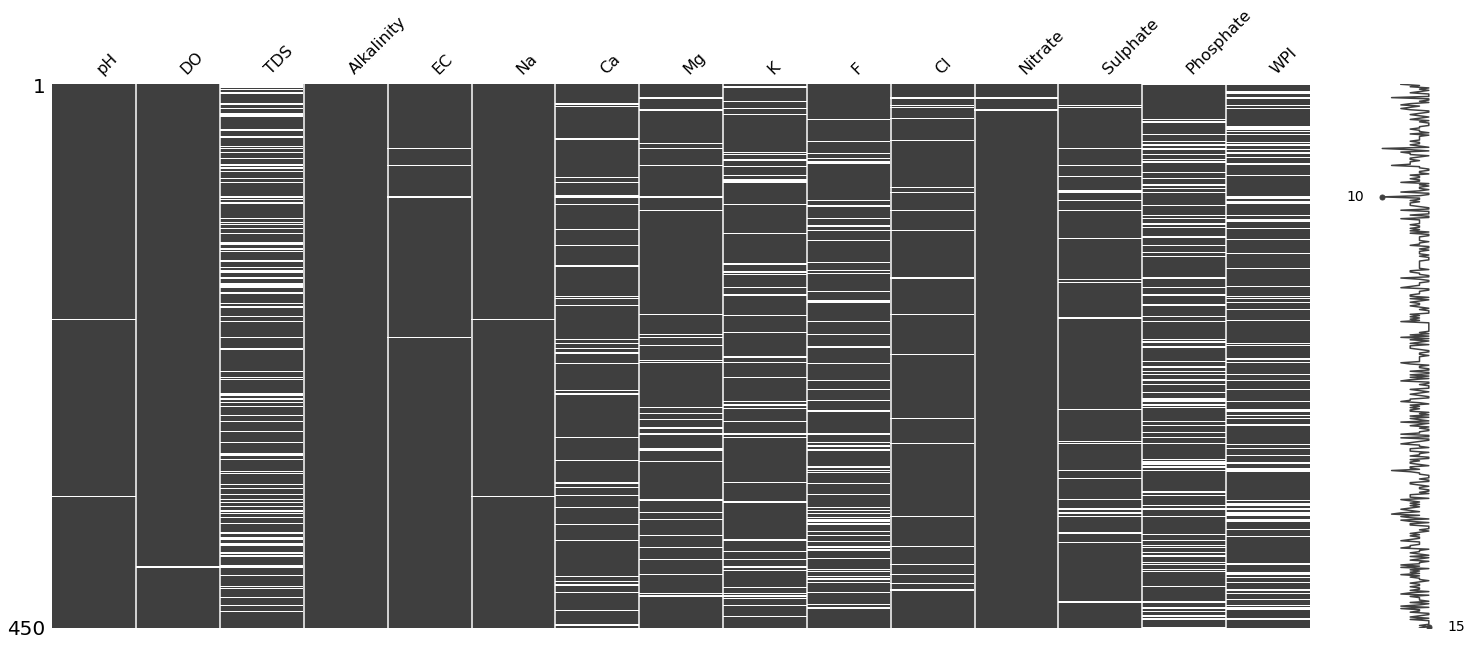

In [44]:
%matplotlib inline
msns.matrix(data.sample(450))

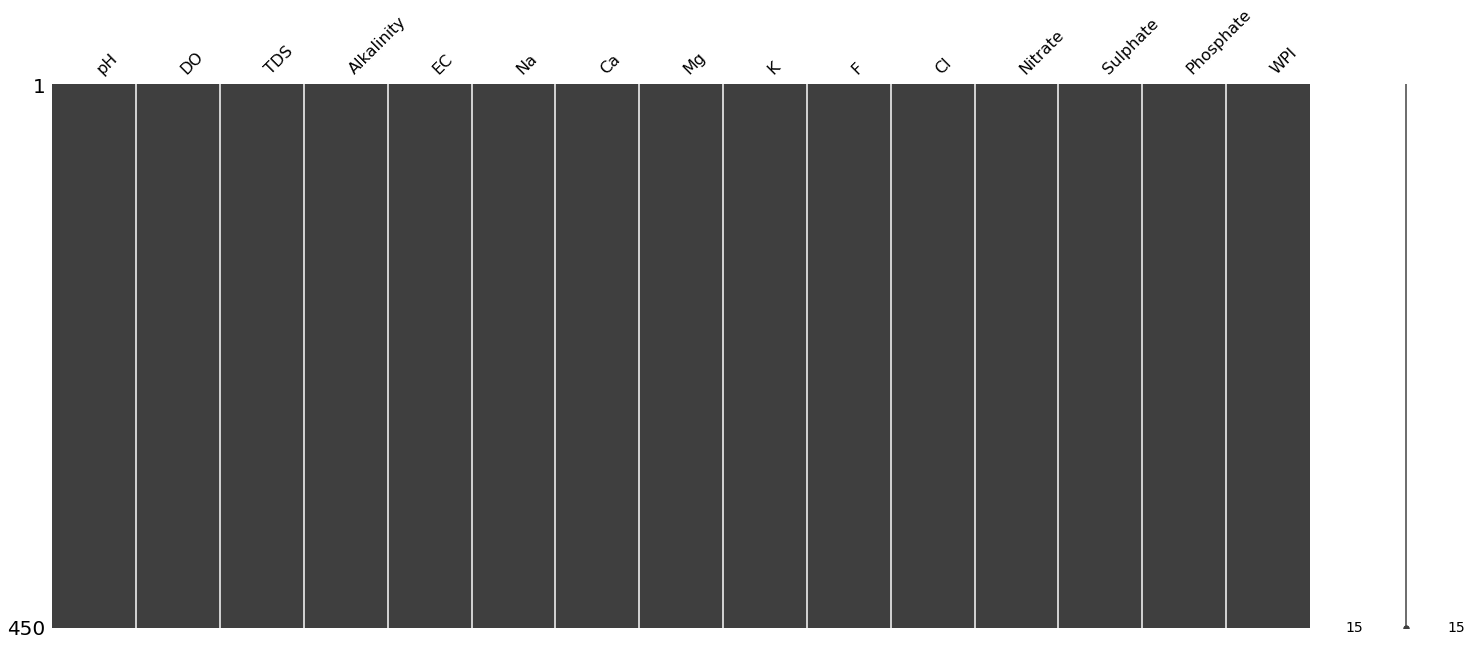

In [45]:
msns.matrix(data_new.sample(450))

In [46]:
data_new

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
Date,,,,,,,,,,,,,,,
2014-01-01,8.14,8.7,84.0,52,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
2014-01-02,7.70,8.8,110.0,76,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2014-01-03,7.60,7.5,75.0,44,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
2014-01-04,7.60,9.1,76.0,56,127.0,8.11,44.0,18.0,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
2014-01-05,7.60,7.3,84.0,52,140.0,8.11,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-28,7.60,5.6,259.0,8,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
2015-04-29,7.30,5.6,259.0,96,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
2015-04-30,5.10,5.8,290.0,12,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811


In [47]:
print(data_new.isnull().sum())

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
dtype: int64


**k-Nearest Neighbors (kNN) Imputation**

In [61]:
pip install missingpy

     |████████████████████████████████| 51kB 2.0MB/s 


In [62]:
miss_data=data
miss_data

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
Date,,,,,,,,,,,,,,,
2014-01-01,8.14,8.7,84.0,52,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
2014-01-02,7.70,8.8,110.0,76,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2014-01-03,7.60,7.5,75.0,44,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
2014-01-04,NaN,9.1,76.0,56,127.0,NaN,44.0,18.0,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
2014-01-05,NaN,7.3,84.0,52,140.0,NaN,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-28,7.60,5.6,NaN,8,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
2015-04-29,7.30,5.6,NaN,96,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
2015-04-30,5.10,5.8,290.0,12,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811


In [63]:
from missingpy import KNNImputer
imputer = KNNImputer()
miss_data_imputed = imputer.fit_transform(miss_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/missingpy/pairwise_external.py:135: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
/usr/local/lib/python3.7/dist-packages/missingpy/pairwise_external.py:138: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
/usr/local/lib/python3.7/dist-packages/missingpy/utils.py:1

In [64]:
miss_data_imputed

array([[8.14000000e+00, 8.70000000e+00, 8.40000000e+01, ...,
        6.53466000e+00, 6.21105000e-02, 2.49527720e-01],
       [7.70000000e+00, 8.80000000e+00, 1.10000000e+02, ...,
        8.13862000e+00, 9.60000000e-03, 2.16399625e-01],
       [7.60000000e+00, 7.50000000e+00, 7.50000000e+01, ...,
        3.85562500e+00, 1.28000000e-02, 1.83814107e-01],
       ...,
       [5.10000000e+00, 5.80000000e+00, 2.90000000e+02, ...,
        8.99100000e+01, 1.63000000e-01, 3.26810635e-01],
       [7.40000000e+00, 6.40000000e+00, 2.15000000e+02, ...,
        4.85000000e+01, 2.19000000e-01, 5.09969501e-01],
       [7.60000000e+00, 6.90000000e+00, 2.33200000e+02, ...,
        5.99400000e+01, 7.00000000e-02, 4.22550635e-01]])

In [66]:
miss_data_imputed.shape

(487, 15)

In [73]:
data1=miss_data_imputed

In [74]:
df = pd.DataFrame(data1, columns =['pH', 'DO', 'TDS',	'Alkalinity',	'EC',	'Na',	'Ca',	'Mg',	'K',	'F',	'Cl',	'Nitrate',	'Sulphate',	'Phosphate',	'WPI'])
print("\nPandas DataFrame: ")
df


Pandas DataFrame: 


,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.140,8.7,84.0,52.0,147.8,4.480,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.700,8.8,110.0,76.0,188.0,8.610,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.600,7.5,75.0,44.0,128.0,8.110,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.294,9.1,76.0,56.0,127.0,5.138,44.0,18.0,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,7.702,7.3,84.0,52.0,140.0,6.196,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.600,5.6,201.0,8.0,370.0,16.140,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.300,5.6,251.0,96.0,434.0,20.560,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.100,5.8,290.0,12.0,487.0,37.350,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.400,6.4,215.0,72.0,385.0,20.060,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [75]:
print(df.isnull().sum())

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
dtype: int64


**Random Forest Imputation (MissForest)**

In [76]:
from missingpy import MissForest
imputer = MissForest()
rf_imputed = imputer.fit_transform(miss_data)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [77]:
rf_imputed

array([[8.14000000e+00, 8.70000000e+00, 8.40000000e+01, ...,
        6.53466000e+00, 6.21105000e-02, 2.49527720e-01],
       [7.70000000e+00, 8.80000000e+00, 1.10000000e+02, ...,
        8.13862000e+00, 9.60000000e-03, 2.16399625e-01],
       [7.60000000e+00, 7.50000000e+00, 7.50000000e+01, ...,
        3.85562500e+00, 1.28000000e-02, 1.83814107e-01],
       ...,
       [5.10000000e+00, 5.80000000e+00, 2.90000000e+02, ...,
        8.99100000e+01, 1.63000000e-01, 3.26810635e-01],
       [7.40000000e+00, 6.40000000e+00, 2.21340000e+02, ...,
        4.85000000e+01, 2.19000000e-01, 5.09969501e-01],
       [7.60000000e+00, 6.90000000e+00, 2.45330000e+02, ...,
        5.99400000e+01, 7.00000000e-02, 4.22550635e-01]])

In [78]:
df = pd.DataFrame(rf_imputed, columns =['pH', 'DO', 'TDS',	'Alkalinity',	'EC',	'Na',	'Ca',	'Mg',	'K',	'F',	'Cl',	'Nitrate',	'Sulphate',	'Phosphate',	'WPI'])
print("\nPandas DataFrame: ")
df


Pandas DataFrame: 


,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14000,8.7,84.00,52.0,147.8,4.4800,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70000,8.8,110.00,76.0,188.0,8.6100,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60000,7.5,75.00,44.0,128.0,8.1100,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.15237,9.1,76.00,56.0,127.0,6.0874,44.0,18.0,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,7.48430,7.3,84.00,52.0,140.0,5.4066,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60000,5.6,213.79,8.0,370.0,16.1400,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30000,5.6,259.50,96.0,434.0,20.5600,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10000,5.8,290.00,12.0,487.0,37.3500,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40000,6.4,221.34,72.0,385.0,20.0600,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970
